In [1]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png, titlefontsize=12)

ECDF(A, x) = count(≤(x), A)/length(A)

function plot_mixedtest(; distx=Normal(0, 1), disty=Normal(0, 1.5), m=25, n=15, threshold=0.05, α=0.05, L=10^6)
    @show distx
    @show disty
    @show m
    @show n
    @show threshold
    @show α
    println()

    pval_Ftest = zeros(L)
    pval_Student = zeros(L)
    pval_Welch = zeros(L)
    pval_mixedtest = zeros(L)

    Threads.@threads for i in 1:L
        X = rand(distx, m)
        Y = rand(disty, n)
        pval_Ftest[i] = pvalue(VarianceFTest(X, Y))
        pval_Student[i] = pvalue(EqualVarianceTTest(X, Y))
        pval_Welch[i] = pvalue(UnequalVarianceTTest(X, Y))
        pval_mixedtest[i] = pval_Ftest[i] ≤ threshold ? pval_Welch[i] : pval_Student[i]
    end

    @show ECDF(pval_Ftest, threshold)
    @show ECDF(pval_mixedtest, α)
    @show ECDF(pval_Student, α)
    @show ECDF(pval_Welch, α)

    _tick = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
    tick = (_tick, string.(_tick))

    P = plot(α -> ECDF(pval_Ftest, α), 0.005, 1; label="F-test", c=:red)
    plot!(identity, 0.005, 1; label="", ls=:dot, c=:black, alpha=0.5)
    plot!(xscale=:log10, yscale=:log10)
    plot!(xtick=tick, ytick=tick)
    plot!(xlim=(0.004, 1), ylim=(0.004, 1))
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    title!("F-test")
    plot!(size=(400, 400))

    Q = plot()
    plot!(α -> ECDF(pval_mixedtest, α), 0.005, 1; label="mixed t-test")
    plot!(α -> ECDF(pval_Student, α), 0.005, 1; label="Student's t-test", ls=:dash)
    plot!(α -> ECDF(pval_Welch, α), 0.005, 1; label="Welch's t-test", ls=:dashdot)
    plot!(identity, 0.005, 1; label="", ls=:dot, c=:black, alpha=0.5)
    plot!(xscale=:log10, yscale=:log10)
    plot!(xtick=tick, ytick=tick)
    plot!(xlim=(0.004, 1), ylim=(0.004, 1))
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    title!("t-tests")
    plot!(size=(400, 400))

    plot(P, Q; size=(800, 400))
    plot!(leftmargin=4Plots.mm)
end

plot_mixedtest (generic function with 1 method)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=0.0, σ=1.5)
m = 25
n = 15
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.4078983
ECDF(pval_mixedtest, α) = 0.0618822
ECDF(pval_Student, α) = 0.0758416
ECDF(pval_Welch, α) = 0.0503814


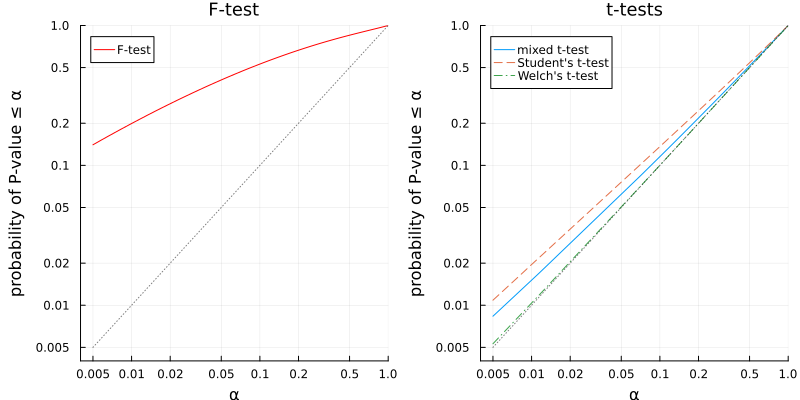

In [2]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(0, 1.5), m=25, n=15, threshold=0.05, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=0.0, σ=1.5)
m = 25
n = 15
threshold = 0.4
α = 0.05

ECDF(pval_Ftest, threshold) = 0.806706
ECDF(pval_mixedtest, α) = 0.0519974
ECDF(pval_Student, α) = 0.0758776
ECDF(pval_Welch, α) = 0.0504797


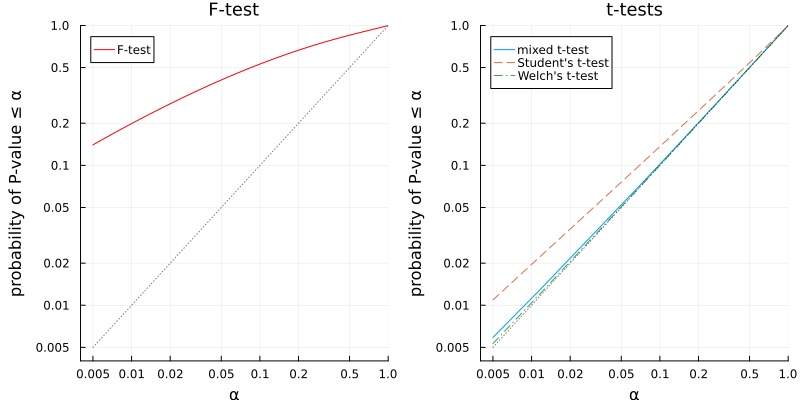

In [3]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(0, 1.5), m=25, n=15, threshold=0.4, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=1.0, σ=1.0)
m = 25
n = 15
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.0500874
ECDF(pval_mixedtest, α) = 0.8459595
ECDF(pval_Student, α) = 0.846965
ECDF(pval_Welch, α) = 0.840651


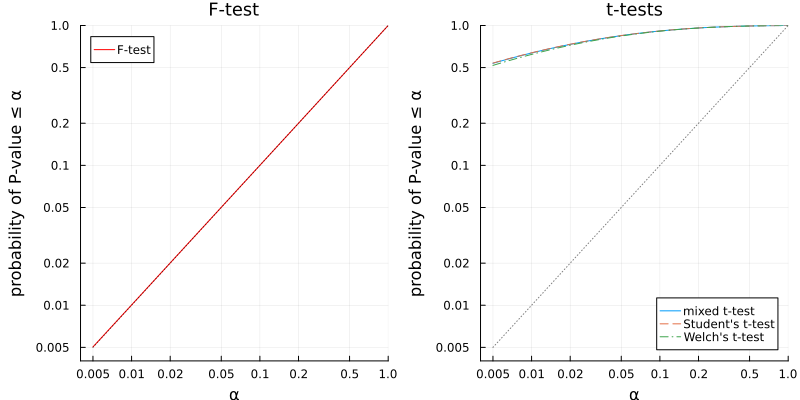

In [4]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(1, 1), m=25, n=15, threshold=0.05, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=1.0, σ=1.0)
m = 10
n = 10
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.0499575
ECDF(pval_mixedtest, α) = 0.5607213
ECDF(pval_Student, α) = 0.5620613
ECDF(pval_Welch, α) = 0.5563911


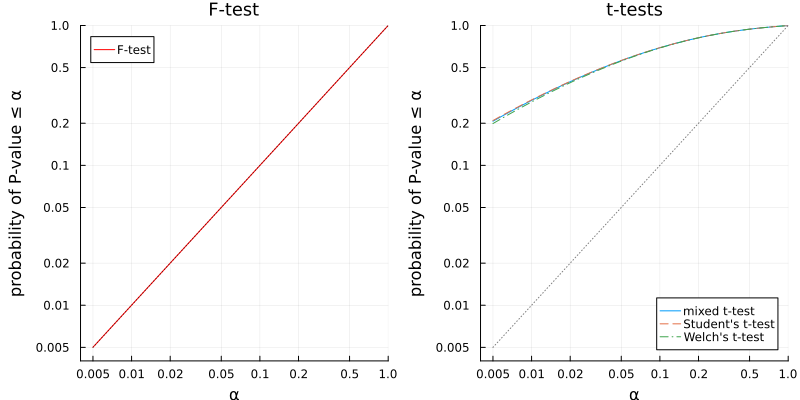

In [5]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(1, 1), m=10, n=10, threshold=0.05, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=10.0)
disty = Normal{Float64}(μ=10.0, σ=10.0)
m = 10
n = 10
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.0499961
ECDF(pval_mixedtest, α) = 0.5606385
ECDF(pval_Student, α) = 0.561993
ECDF(pval_Welch, α) = 0.5563248


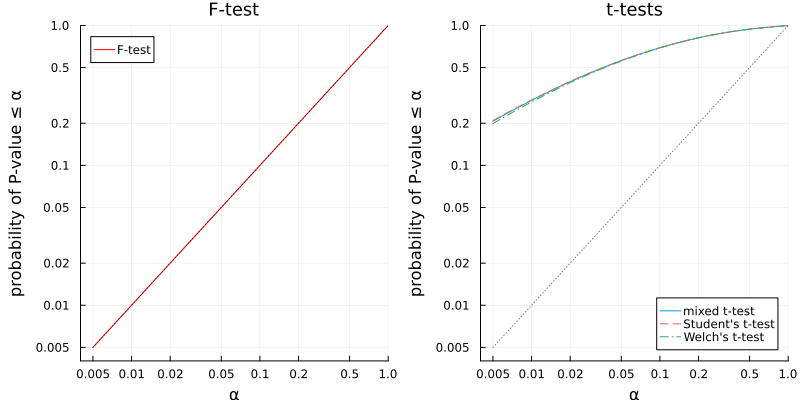

In [6]:
plot_mixedtest(; distx=Normal(0, 10), disty=Normal(10, 10), m=10, n=10, threshold=0.05, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=1.0, σ=1.0)
m = 20
n = 20
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.0499745
ECDF(pval_mixedtest, α) = 0.8688723
ECDF(pval_Student, α) = 0.8690538
ECDF(pval_Welch, α) = 0.8683445


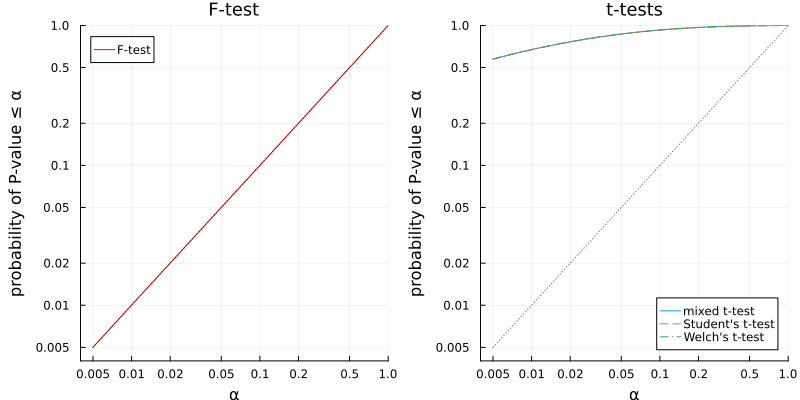

In [7]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(1, 1), m=20, n=20, threshold=0.05, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=0.0, σ=1.0)
m = 10
n = 10
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.0500716
ECDF(pval_mixedtest, α) = 0.0496044
ECDF(pval_Student, α) = 0.0499379
ECDF(pval_Welch, α) = 0.0484843


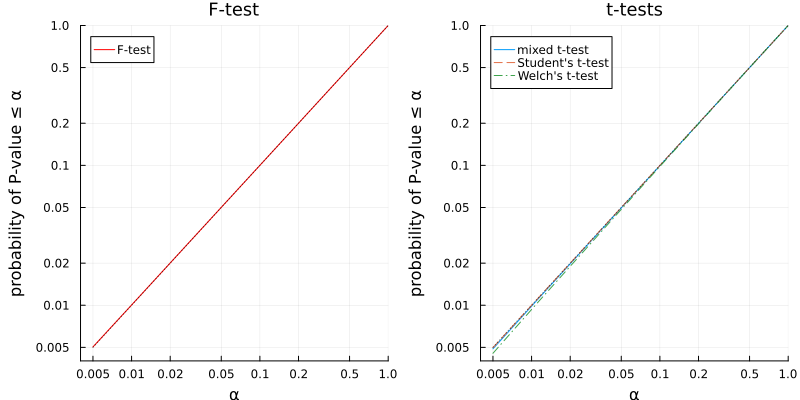

In [8]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(0, 1), m=10, n=10, threshold=0.05, α=0.05, L=10^7)

distx = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal{Float64}(μ=0.0, σ=2.0)
m = 10
n = 10
threshold = 0.05
α = 0.05

ECDF(pval_Ftest, threshold) = 0.4965327
ECDF(pval_mixedtest, α) = 0.0516888
ECDF(pval_Student, α) = 0.0547345
ECDF(pval_Welch, α) = 0.0501841


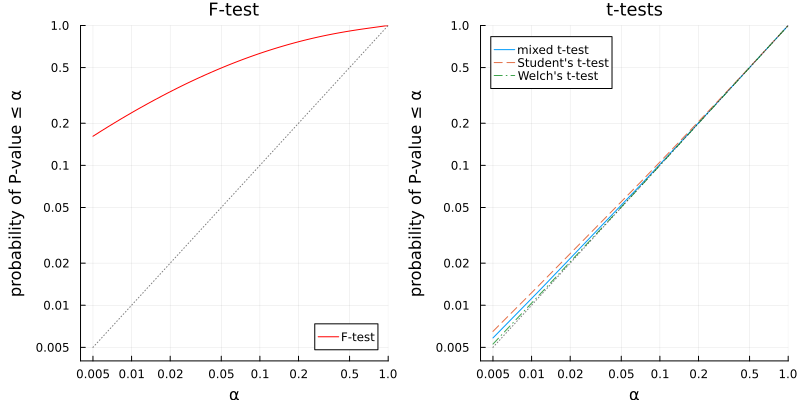

In [9]:
plot_mixedtest(; distx=Normal(0, 1), disty=Normal(0, 2), m=10, n=10, threshold=0.05, α=0.05, L=10^7)